# Beta Bank Client CHurn Analysis

## 1. Defining the Question

### a) Data Analysis Question

Can we predict whether a customer will leave the bank soon?

### b) Metric for Success

The model should have the maximum possible F1 score of at least 0.59

### c) Understanding the context 

Beta Bank customers are leaving: little by little, chipping away every month. The bankers figured out it’s cheaper to save the existing customers rather than to attract new ones.

We need to predict whether a customer will leave the bank soon. We have the data on clients’ past behavior and termination of contracts with the bank.

### d) Experimental Design

1. Data Importation
2. Data Exploration
3. Data Cleaning
4. Data Preparation
5. Data Modeling (Using Decision Trees, Random Forest and Logistic Regression)
6. Model Evaluation
7. Hyparameter Tuning
8. Findings and Recommendations

### e) Data Relevance

The given data set is relevant in answering the research question.

## 2. Reading the Data

In [158]:
# Importing our libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error,accuracy_score, \
    f1_score,recall_score,precision_score,r2_score, \
    precision_recall_curve,roc_curve,roc_auc_score,make_scorer
from sklearn.utils import resample,shuffle
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Disable warnings  when running cells
import sys
import warnings
if not sys.warnoptions:
       warnings.simplefilter("ignore")



In [122]:
# Load the data below
# --- 
url = "https://raw.githubusercontent.com/wambasisamuel/DE_Week04_Thursday/main/bank_churn.csv"
df = pd.read_csv(url) 

In [123]:
# Checking the first 5 rows of data
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [124]:
# Checking the last 5 rows of data
# ---
df.tail(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,NaN,130142.79,1,1,0,38190.78,0


In [125]:
# Checking number of rows and columns
df.shape

(10000, 14)

In [126]:
# Checking datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Observations:

*   The are 10000 observations in the dataset.
*   The dataset has 14 features.
*   There are 3 categorical features
*   There are 11 numerical features



## 3. External Data Source Validation

The provided dataset has enough features to help in developing a machine learning model that can predict client churn from Beta bank.

## 4. Data Preparation

### Data Standardisation

In [127]:
# Standardise column names
# ---'
# remove ? from column names 
df.columns = df.columns.str.strip().str.lower()
df.columns

Index(['rownumber', 'customerid', 'surname', 'creditscore', 'geography',
       'gender', 'age', 'tenure', 'balance', 'numofproducts', 'hascrcard',
       'isactivemember', 'estimatedsalary', 'exited'],
      dtype='object')

### Data Cleaning

#### Irrelevant Data

The columns *rownumber, customerid and surname* do not have valueable use for this analysis, hence I will remove them.

In [128]:
df.drop(columns=['rownumber', 'customerid', 'surname'],inplace=True)
df

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


#### Duplicate data

In [129]:
# Find the total duplicate records
df.duplicated().sum()

0

#### Missing Data

In [130]:
# Checking missing entries of all the variables
# ---
# 
df.isnull().sum()

creditscore          0
geography            0
gender               0
age                  0
tenure             909
balance              0
numofproducts        0
hascrcard            0
isactivemember       0
estimatedsalary      0
exited               0
dtype: int64

In [131]:
# I will replace null values in the `tenure` column with the mean
df['tenure'].fillna(value=df['tenure'].mean(), inplace=True)

In [132]:
# Checking missing entries of all the variables
# ---
# 
df.isnull().sum()

creditscore        0
geography          0
gender             0
age                0
tenure             0
balance            0
numofproducts      0
hascrcard          0
isactivemember     0
estimatedsalary    0
exited             0
dtype: int64

## 5. Data Modelling

#### Data Preprocessing

Transforming categorical features into numerical features.

In [133]:
df_ohe = pd.get_dummies(df, drop_first=True)

Splitting the dataset

In [134]:
# Features and Targets
features = df_ohe.drop(columns=['exited'])
target =  df_ohe['exited']

# Splitting the data into training, testing and validation sets. Of the base dataset: 20% - testing, 80% - training.
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.20, random_state=12345)
features_train, features_valid, target_train, target_valid = train_test_split(features_train, target_train, test_size=0.2, random_state=12345 )

Standardize numerical features

In [135]:
# Standardize numerical features
numeric_features = ['creditscore', 'age', 'balance', 'estimatedsalary', 'tenure', 'numofproducts']
scaler = StandardScaler()
scaler.fit(features_train[numeric_features])
features_train.loc[:,numeric_features] = scaler.transform(features_train[numeric_features])
features_valid.loc[:,numeric_features] = scaler.transform(features_valid[numeric_features])
features_test.loc[:,numeric_features] = scaler.transform(features_test[numeric_features])


#### Class Balance

0    0.7963
1    0.2037
Name: exited, dtype: float64


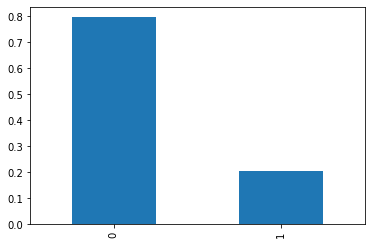

In [136]:
class_freq = df_ohe['exited'].value_counts(normalize= True)
print(class_freq)
class_freq.plot(kind='bar')
plt.show()

There is imbalance of classes.

#### Sanity check


I will create a model which always predicts value 0 and see it's accuracy and F1 score

In [137]:
target_pred_constant = pd.Series(0, index=range(target_valid.shape[0]))

print(accuracy_score(target_valid, target_pred_constant))
print('F1:', f1_score(target_valid, target_pred_constant))

0.810625
F1: 0.0


#### Modelling with Imbalance

In [138]:
log_reg_imb = LogisticRegression(solver='liblinear', random_state=12345)
log_reg_imb.fit(features_train,target_train)
predicted_valid = log_reg_imb.predict(features_valid)

print('Accuracy: ', log_reg_imb.score(features_valid, target_valid))
print('F1 score: ', f1_score(target_valid, predicted_valid))
print('F1 score: ',  roc_auc_score(target_valid, log_reg_imb.predict_proba(features_valid)[:,1]))

Accuracy:  0.818125
F1 score:  0.3185011709601873
F1 score:  0.7633024674865327




Without accounting for class imbalance, logistic regression achieves an accuracy of 0.81, f1 score of 0.31, and AUC of 0.76.

Random Forest and Decision Tree models are affected with class imbalance as well, hence I won't check for these models.


#### Accounting for Imbalance

In [139]:
log_reg_bal = LogisticRegression(random_state=12345, class_weight='balanced', solver='liblinear')
log_reg_bal.fit(features_train,target_train)
predicted_valid = log_reg_bal.predict(features_valid)

print('Accuracy: ', log_reg_bal.score(features_valid, target_valid))
print('F1 score: ', f1_score(target_valid, predicted_valid))
print('AUC: ',  roc_auc_score(target_valid, log_reg_bal.predict_proba(features_valid)[:,1]))

Accuracy:  0.706875
F1 score:  0.4664391353811149
F1 score:  0.7664984694305977


After accounting for imbalance, we achieve accuracy of 0.70, f1 score of 0.47, and AUC of 0.77. The f1 score has improved at te expense of accuracy.

#### Upsampling

In [143]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 10)

log_reg_upsampled =LogisticRegression(random_state=12345,solver='liblinear')
log_reg_upsampled.fit(features_upsampled, target_upsampled)
log_reg_upsampled_predicted_valid = log_reg_upsampled.predict(features_valid)

print('Accuracy', log_reg_upsampled.score(features_valid, target_valid))
print('f1 score:' ,f1_score(target_valid, log_reg_upsampled_predicted_valid))
print('AUC:',roc_auc_score(target_valid, log_reg_upsampled.predict_proba(features_valid)[:,1]))

Accuracy 0.453125
f1 score: 0.3927827897293546
AUC: 0.767696970159622


 Upsampling gives an F1 score of 0.3927

#### Downsampling

In [144]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.1)

log_reg_downsampled =LogisticRegression(random_state=12345,solver='liblinear')
log_reg_downsampled.fit(features_downsampled, target_downsampled)
log_reg_downsampled_predicted_valid = log_reg_downsampled.predict(features_valid)

print("F1:", f1_score(target_valid, log_reg_downsampled_predicted_valid))
print('Accuracy:', log_reg_downsampled.score(features_valid, target_valid))
print("AUC-ROC:", roc_auc_score(target_valid, log_reg_downsampled.predict_proba(features_valid)[:,1]))

F1: 0.39199447895100065
Accuracy: 0.449375
AUC-ROC: 0.7645111465656974


Downsampling gives an F1 score of 0.3920

#### Decision Tree

In [152]:
for depth in range(1,15):
  model =  DecisionTreeClassifier(random_state = 12345, max_depth = depth)
  model.fit(features_train, target_train)
  predicted_valid = model.predict(features_valid)
  print('\n========Depth = ',depth,' ========')
  print('Accuracy:' , accuracy_score(target_valid, predicted_valid))
  print('F1:', f1_score(target_valid, predicted_valid))
  print("AUC-ROC:", roc_auc_score(target_valid, model.predict_proba(features_valid)[:,1]))


========Depth =  1  ========
Accuracy: 0.810625
F1: 0.0
AUC-ROC: 0.6878236397271184

========Depth =  2  ========
Accuracy: 0.838125
F1: 0.50853889943074
AUC-ROC: 0.7455832321859787

========Depth =  3  ========
Accuracy: 0.845
F1: 0.3921568627450979
AUC-ROC: 0.7986544221114478

========Depth =  4  ========
Accuracy: 0.853125
F1: 0.43645083932853723
AUC-ROC: 0.812114017878272

========Depth =  5  ========
Accuracy: 0.858125
F1: 0.5642994241842609
AUC-ROC: 0.8301831339649001

========Depth =  6  ========
Accuracy: 0.86375
F1: 0.5176991150442477
AUC-ROC: 0.8132692606191999

========Depth =  7  ========
Accuracy: 0.863125
F1: 0.5539714867617108
AUC-ROC: 0.8120300464896143

========Depth =  8  ========
Accuracy: 0.85125
F1: 0.5258964143426295
AUC-ROC: 0.7884709827960437

========Depth =  9  ========
Accuracy: 0.848125
F1: 0.5225933202357564
AUC-ROC: 0.7552043176561295

========Depth =  10  ========
Accuracy: 0.848125
F1: 0.5299806576402321
AUC-ROC: 0.7400373036532644

========Depth =  11 

A decision tree model with optimized hyper parameters (depth=6) gives an F1 score of 0.5177

#### Random Forest

In [154]:
params = {'max_depth':range(1,10), 'n_estimators':range(1,50)}
rand_frst_model = RandomForestClassifier(random_state=12345)
rand_frst_optimized = GridSearchCV(rand_frst_model, params)

# Train using the optimized model
rand_frst_optimized.fit(features_train, target_train)

print(rand_frst_optimized.best_estimator_)

# Predict using the optimized model
predicted_valid = rand_frst_optimized.predict(features_valid)

print('Accuracy', rand_frst_optimized.score(features_valid, target_valid))
print("F1:", f1_score(target_valid, predicted_valid))
print("AUC-ROC:", roc_auc_score(target_valid, rand_frst_optimized.predict_proba(features_valid)[:,1]))

RandomForestClassifier(max_depth=8, n_estimators=28, random_state=12345)
Accuracy 0.866875
F1: 0.5571725571725572
AUC-ROC: 0.850553829477011


The random forest model gives an F1 score of 0.5572; however, this takes a very long time to run. We are yet to achieve an F1 score of at least 0.59. The max_depth of 8 gives the best result. I will keep this parameter constant and increase the range of n_estimators and investigate the effect on perfomance. I will add the parameter 'class weight = balanced'

In [155]:
params = {'n_estimators':range(1,201)}
rand_frst_model = RandomForestClassifier(random_state=12345, max_depth = 8,class_weight='balanced')
rand_frst_optimized = GridSearchCV(rand_frst_model, params)

# Train using the optimized model
rand_frst_optimized.fit(features_train, target_train)

print(rand_frst_optimized.best_estimator_)

# Predict using the optimized model
predicted_valid = rand_frst_optimized.predict(features_valid)

print('Accuracy', rand_frst_optimized.score(features_valid, target_valid))
print("F1:", f1_score(target_valid, predicted_valid))
print("AUC-ROC:", roc_auc_score(target_valid, rand_frst_optimized.predict_proba(features_valid)[:,1]))

RandomForestClassifier(class_weight='balanced', max_depth=8, n_estimators=190,
                       random_state=12345)
Accuracy 0.830625
F1: 0.6055312954876274
AUC-ROC: 0.8606380298785467


190 n_estimators are needed to produce the final optimized model which gives an F1 score of 0.606 

I will use this model for testing.

In [156]:
predicted_test = rand_frst_optimized.predict(features_test)
print("F1:", f1_score(target_test, predicted_test))
print("AUC-ROC:", roc_auc_score(target_test, rand_frst_optimized.predict_proba(features_test)[:,1]))
print('Accuracy:', rand_frst_optimized.score(features_valid, target_valid))

F1: 0.647374062165059
AUC-ROC: 0.8693601480486727
Accuracy: 0.830625


Applying the optimized model on the test dataset gives an F1 score of 0.6474 and the AUC-ROC score of 0.8693. These meet the requirements for this project.

## 6. Conclusion

#### AUC-ROC Curve

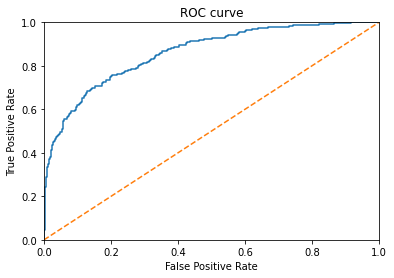

In [157]:
valid_probabilities = rand_frst_optimized.predict_proba(features_valid)
valid_ones_probabilities = valid_probabilities[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, valid_ones_probabilities)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

#### Findings

A Random Forest Classifier is the best model. Bootstrap is set to true and the class_weight parameter is set to '*balanced*

The hyperparameters are set as follows:

* random_state = 12345
* max_depth = 8
* n_estimators = 90

Applying the final optimized model on the test dataset, gives an F1 score of 0.6474 and the AUC-ROC score is 0.8693. Both these metrics signify good quality and meet the expectations of the project.



